# Pollutant Piechartn for Top 10 Cleanest Cities

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              font_scale=1.2, # This scales the fonts slightly higher
              )
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

In [2]:
df = pd.read_csv('../../data/processed/pollution.csv')
df

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,37,0.878947,25.0,3.000000,13.0,19.041667,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,30,1.066667,26.0,1.958333,4.0,22.958333,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,15,1.762500,28.0,5.250000,16.0,38.125000,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,31,1.829167,34.0,7.083333,23.0,40.260870,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,11,2.700000,42.0,8.708333,21.0,48.450000,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,2021-06-26,2021,6,26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.040588,45,0.100000,1.0,0.409091,0.0,1.281818,2
608695,2021-06-27,2021,6,27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.037882,39,0.100000,1.0,0.325000,0.0,1.104167,2
608696,2021-06-28,2021,6,28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.039765,46,0.100000,1.0,0.326087,0.0,1.678261,5
608697,2021-06-29,2021,6,29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.049176,61,0.066667,1.0,0.317391,0.0,2.934783,7


In [3]:
cities = pd.read_csv('../../data/processed/top10clean.csv')[['City']]
cities

,City
0,Eureka
1,Presque Isle
2,Vandenberg Air Force Base
3,Londonderry
4,Grantsville
5,Bismarck
6,Lompoc
7,Cornwall
8,Riverton
9,Waco


In [4]:
df1 = df.drop(columns=['Date', 'Year', 'Month', 'Day', 'State', 'County', 'Address', 'O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI'])
df1

,City,O3 Mean,CO Mean,SO2 Mean,NO2 Mean
0,Phoenix,0.019765,0.878947,3.000000,19.041667
1,Phoenix,0.015882,1.066667,1.958333,22.958333
2,Phoenix,0.009353,1.762500,5.250000,38.125000
3,Phoenix,0.015882,1.829167,7.083333,40.260870
4,Phoenix,0.007353,2.700000,8.708333,48.450000
...,...,...,...,...,...
608694,Not in a city,0.040588,0.100000,0.409091,1.281818
608695,Not in a city,0.037882,0.100000,0.325000,1.104167
608696,Not in a city,0.039765,0.100000,0.326087,1.678261
608697,Not in a city,0.049176,0.066667,0.317391,2.934783


In [5]:
O3 = df1.groupby('City')[['O3 Mean']].mean().reset_index()
O3


,City,O3 Mean
0,Albuquerque,0.034981
1,Alexandria,0.031887
2,Altoona,0.030418
3,Annandale,0.030167
4,Arden-Arcade,0.028366
...,...,...
143,Wilkes-Barre,0.030749
144,Wilmington,0.028282
145,Winston-Salem,0.038679
146,Winter Park,0.029220


In [6]:
CO = df1.groupby('City')[['CO Mean']].mean().reset_index()
CO

,City,CO Mean
0,Albuquerque,0.215085
1,Alexandria,0.310460
2,Altoona,0.154131
3,Annandale,0.478949
4,Arden-Arcade,0.370411
...,...,...
143,Wilkes-Barre,0.208728
144,Wilmington,0.252862
145,Winston-Salem,0.461236
146,Winter Park,0.448425


In [7]:
SO2 = df1.groupby('City')[['SO2 Mean']].mean().reset_index()
SO2

,City,SO2 Mean
0,Albuquerque,0.579792
1,Alexandria,2.937927
2,Altoona,4.151453
3,Annandale,5.047360
4,Arden-Arcade,0.952418
...,...,...
143,Wilkes-Barre,3.111206
144,Wilmington,0.712933
145,Winston-Salem,3.764752
146,Winter Park,0.427436


In [8]:
NO2 = df1.groupby('City')[['NO2 Mean']].mean().reset_index()
NO2

,City,NO2 Mean
0,Albuquerque,10.865637
1,Alexandria,17.949247
2,Altoona,9.802171
3,Annandale,14.914023
4,Arden-Arcade,9.258798
...,...,...
143,Wilkes-Barre,9.360137
144,Wilmington,10.811691
145,Winston-Salem,10.937148
146,Winter Park,6.786697


In [9]:
df_o3co = pd.merge(O3, CO, on='City')
df_so2no2 = pd.merge(SO2, NO2, on='City')
df_avg = pd.merge(df_o3co, df_so2no2, on='City')
df_avg = pd.merge(df_avg, cities, on='City')
df_avg

,City,O3 Mean,CO Mean,SO2 Mean,NO2 Mean
0,Bismarck,0.028800,0.171340,0.461753,4.800355
1,Cornwall,0.036468,0.158872,0.439825,1.990710
2,Eureka,0.022134,0.280373,0.338900,2.751339
3,Grantsville,0.034029,0.135455,0.550754,2.031577
4,Lompoc,0.027626,0.241398,0.517352,4.196069
5,Londonderry,0.031430,0.173164,0.679801,2.894810
6,Presque Isle,0.027353,0.159378,0.365713,2.113193
7,Riverton,0.035018,0.000000,0.202336,1.545645
8,Vandenberg Air Force Base,0.037123,0.133467,0.325256,0.680757
9,Waco,0.031333,0.133437,0.226484,2.861384


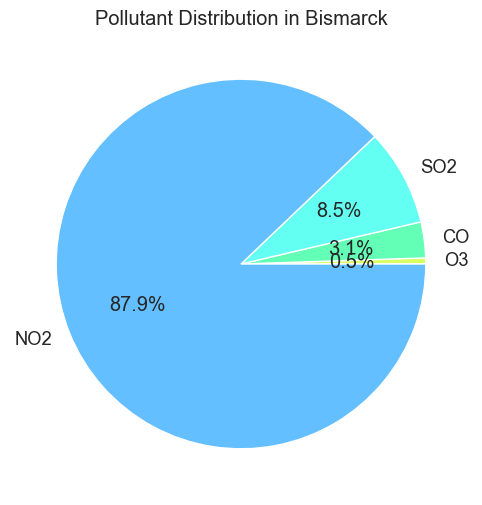

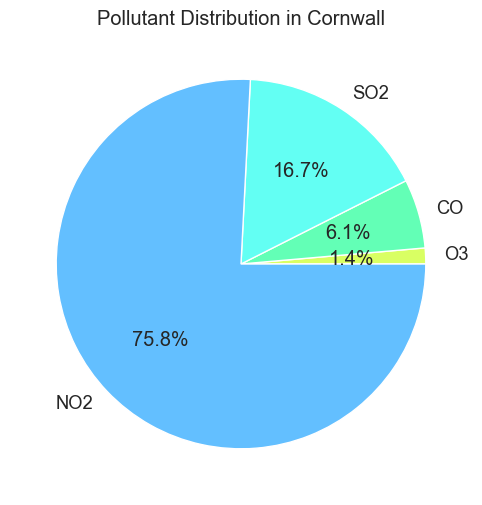

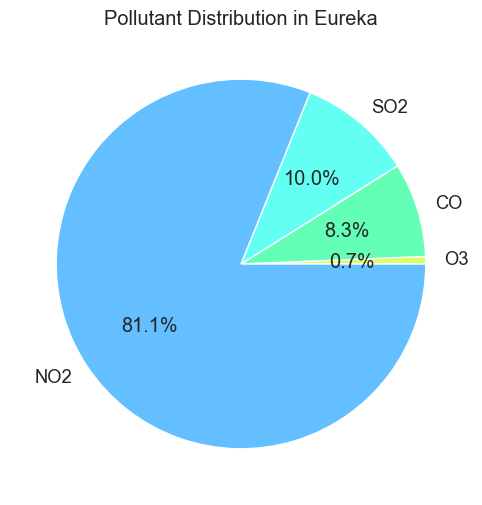

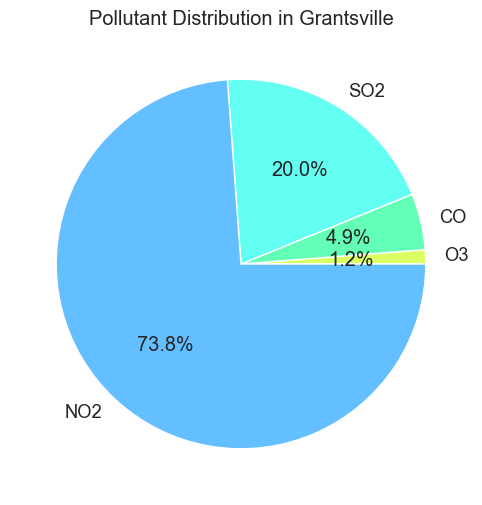

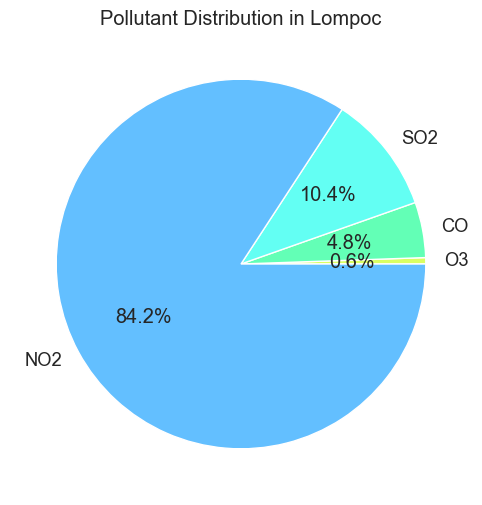

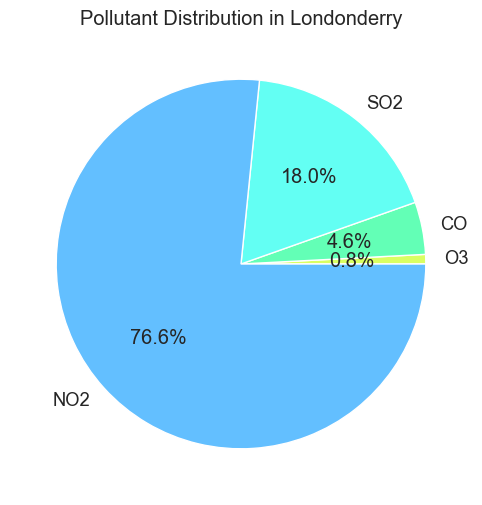

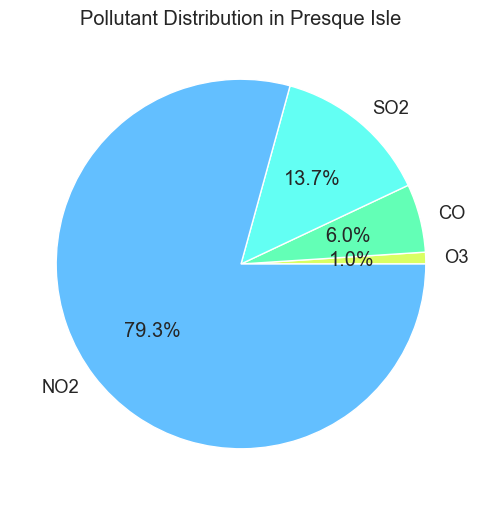

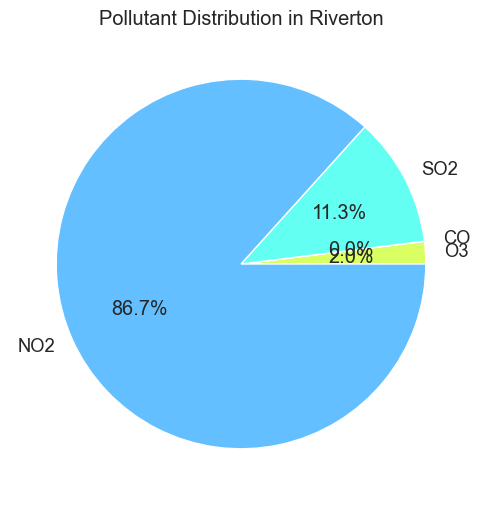

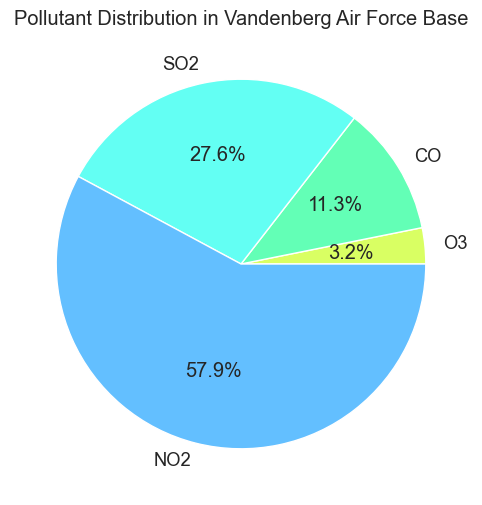

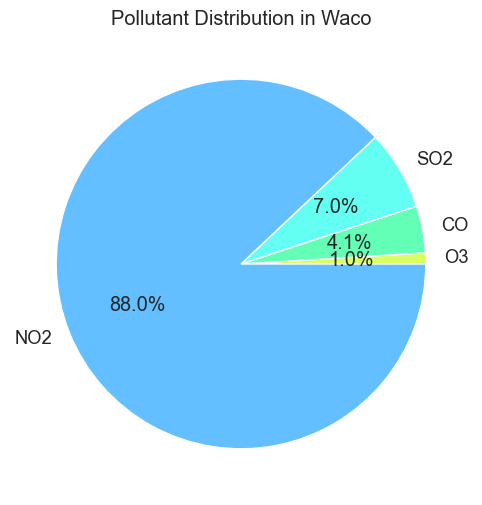

In [10]:
# Iterate over each city and create pie chart for pollutants
for index, row in df_avg.iterrows():
    city = row['City']
    pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
    values = [row[pollutant] for pollutant in pollutants]
    
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=['O3', 'CO', 'SO2', 'NO2'], autopct='%1.1f%%', colors=['#D9FF63', '#63FFB6', '#63FFF3', '#63BFFF'])
    plt.title(f'Pollutant Distribution in {city}')
    plt.show()